# Least Squares Regression

https://www.investopedia.com/terms/l/least-squares-method.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2007-01-01'
end = '2018-12-31'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,20.080000,20.400000,19.350000,19.520000,19.520000,28350300
2007-01-04,19.660000,19.860001,19.320000,19.790001,19.790001,23652500
2007-01-05,19.540001,19.910000,19.540001,19.709999,19.709999,15902400
2007-01-08,19.709999,19.860001,19.370001,19.469999,19.469999,15814800
2007-01-09,19.450001,19.709999,19.370001,19.650000,19.650000,14494200


In [3]:
dataset['Open_Close'] = (dataset['Open'] - dataset['Adj Close'])/dataset['Open']
dataset['High_Low'] = (dataset['High'] - dataset['Low'])/dataset['Low']
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,,,
2007-01-04,19.660000,19.860001,19.320000,19.790001,19.790001,23652500,-0.006612,0.027950,0,0,0,0.013832
2007-01-05,19.540001,19.910000,19.540001,19.709999,19.709999,15902400,-0.008700,0.018935,0,1,0,-0.004043
2007-01-08,19.709999,19.860001,19.370001,19.469999,19.469999,15814800,0.012177,0.025297,0,0,1,-0.012177
2007-01-09,19.450001,19.709999,19.370001,19.650000,19.650000,14494200,-0.010283,0.017553,1,1,1,0.009245
2007-01-10,19.639999,20.020000,19.500000,20.010000,20.010000,19783200,-0.018839,0.026667,1,1,1,0.018321


In [4]:
dataset.shape

(3018, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3018 entries, 2007-01-04 to 2018-12-28
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               3018 non-null   float64
 1   High               3018 non-null   float64
 2   Low                3018 non-null   float64
 3   Close              3018 non-null   float64
 4   Adj Close          3018 non-null   float64
 5   Volume             3018 non-null   int64  
 6   Open_Close         3018 non-null   float64
 7   High_Low           3018 non-null   float64
 8   Increase_Decrease  3018 non-null   int32  
 9   Buy_Sell_on_Open   3018 non-null   int32  
 10  Buy_Sell           3018 non-null   int32  
 11  Returns            3018 non-null   float64
dtypes: float64(8), int32(3), int64(1)
memory usage: 271.1 KB


In [6]:
x = dataset['Adj Close']
y = 1 + x + x * np.random.random(len(x))

In [7]:
A = np.vstack([x, np.ones(len(x))]).T

y = y[:, np.newaxis]

In [8]:
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.5013497 ]
 [1.01950148]]


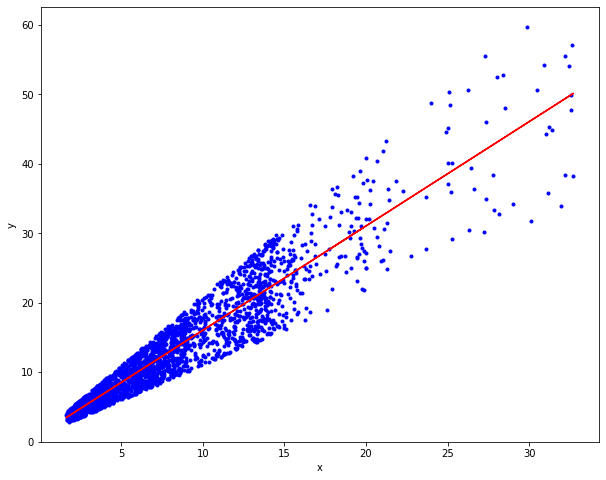

In [9]:
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [10]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.5013497 ]
 [1.01950148]]


In [11]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[1.5013497 ]
 [1.01950148]]


In [12]:
# Mean X and Y
mean_x = np.mean(x)
mean_y = np.mean(y)
 
# Total number of values
n = len(x)

In [13]:
numer = 0
denom = 0
for i in range(n):
    numer += (x[i] - mean_x) * (y[i] - mean_y)
    denom += (x[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)
 
print("Coefficients")
print(m, c)

Coefficients
[1.5013497] [1.01950148]


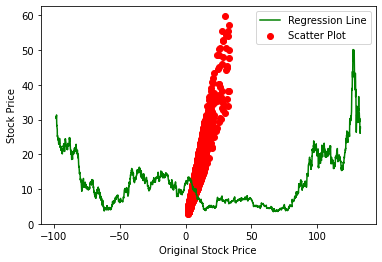

In [14]:
max_x = np.max(x) + 100
min_x = np.min(x) - 100
 
# Calculating line values x and y
X = np.linspace(min_x, max_x, len(x))
Y = c + m * x
 
# Ploting Line
plt.plot(X, Y, color='green', label='Regression Line')
# Ploting Scatter Points
plt.scatter(x, y, c='red', label='Scatter Plot')
 
plt.xlabel('Original Stock Price')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [15]:
rmse = 0
for i in range(n):
    y_pred = c + m * x[i]
    rmse += (y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print("RMSE:")
print(rmse)

RMSE:
[2.53710592]


In [16]:
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = c + m * x[i]
    ss_tot += (y[i] - mean_y) ** 2
    ss_res += (y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print("R2 Score:")
print(r2)

R2 Score:
[0.89856612]
